In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
from tensorflow.keras.datasets import mnist
from numpy import reshape
import random

In [3]:
digits = mnist.load_data()

In [4]:
(xTrain, _), (xTest, _) = digits

In [5]:
random_idx = random.randint(0, len(xTrain) - 1)

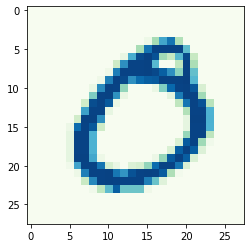

In [6]:
plt.imshow(xTrain[random_idx], cmap= 'GnBu')

In [7]:
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.

In [8]:
print(xTrain.shape)
print(xTest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
xTrainData, xTrainHeight, xTrainWidth = xTrain.shape
xTestData, xTestHeight, xTestWidth = xTest.shape

In [10]:
input_shape = 28 * 28

In [11]:
xTrain = xTrain.reshape(xTrainData, input_shape)
xTest = xTest.reshape(xTestData, input_shape)

In [12]:
print(xTrain.shape)
print(xTest.shape)

(60000, 784)
(10000, 784)


In [13]:
from tensorflow.keras.layers import ReLU, Input, Dense
from tensorflow.keras.models import Model

In [14]:
latent_size = 32

In [20]:
encoder_input = Input(shape= (input_shape,))

encoder_dense1 = Dense(units= 512, activation= 'relu')(encoder_input)
encoder_relu1 = ReLU()(encoder_dense1)

encoder_dense2 = Dense(units= 256, activation= 'relu')(encoder_relu1)
encoder_relu2 = ReLU()(encoder_dense2)

encoder_dense3 = Dense(units= 128, activation= 'relu')(encoder_relu2)
encoder_relu3 = ReLU()(encoder_dense3)

encoder_dense4 = Dense(units= 64, activation= 'relu')(encoder_relu3)
encoder_relu4 = ReLU()(encoder_dense4)

encoder_dense5 = Dense(units= latent_size)(encoder_relu4)
encoder_output = ReLU()(encoder_dense5)

In [21]:
encoder = Model(encoder_input, encoder_output)

In [22]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
re_lu_14 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
re_lu_15 (ReLU)              (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
re_lu_16 (ReLU)              (None, 128)               0   

In [24]:
decoder_input = Input(shape= (latent_size,))

decoder_dense1 = Dense(units= 64, activation= 'relu')(decoder_input)
decoder_relu1 = ReLU()(decoder_dense1)

decoder_dense2 = Dense(units= 128, activation= 'relu')(decoder_relu1)
decoder_relu2 = ReLU()(decoder_dense2)

decoder_dense3 = Dense(units= 256, activation= 'relu')(decoder_relu2)
decoder_relu3 = ReLU()(decoder_dense3)

decoder_dense4 = Dense(units= 512, activation= 'relu')(decoder_relu3)
decoder_relu4 = ReLU()(decoder_dense4)

decoder_dense5 = Dense(units= input_shape, activation= 'softmax')(decoder_relu4)
decoder_output = ReLU()(decoder_dense5)

In [25]:
decoder = Model(decoder_input, decoder_output)

In [26]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
re_lu_23 (ReLU)              (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
re_lu_24 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
re_lu_25 (ReLU)              (None, 256)               0   

In [27]:
auto_encoder_input = Input(shape= (input_shape,))
auto_encoder_encoder_output = encoder(auto_encoder_input)
auto_encoder_decoder_output = decoder(auto_encoder_encoder_output)

In [28]:
auto_encoder = Model(auto_encoder_input, auto_encoder_decoder_output)

In [29]:
auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
model_1 (Functional)         (None, 32)                576480    
_________________________________________________________________
model_2 (Functional)         (None, 784)               577232    
Total params: 1,153,712
Trainable params: 1,153,712
Non-trainable params: 0
_________________________________________________________________


In [32]:
auto_encoder.compile(optimizer= 'adam', loss= 'categorical_crossentropy')

In [34]:
auto_encoder.fit(xTrain, xTrain, epochs= 20, batch_size= 256, shuffle= True)

Epoch 1/20
  1/235 [..............................] - ETA: 59s - loss: 541.3793

2022-08-01 22:32:51.057725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 4s 16ms/step - loss: 526.6965
Epoch 2/20
235/235 [==============================] - 4s 15ms/step - loss: 524.9571
Epoch 3/20
235/235 [==============================] - 3s 15ms/step - loss: 523.7353
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 522.7186
Epoch 5/20
235/235 [==============================] - 4s 15ms/step - loss: 521.8829
Epoch 6/20
235/235 [==============================] - 4s 15ms/step - loss: 521.1355
Epoch 7/20
235/235 [==============================] - 3s 15ms/step - loss: 520.3906
Epoch 8/20
235/235 [==============================] - 4s 15ms/step - loss: 519.7531
Epoch 9/20
235/235 [==============================] - 4s 15ms/step - loss: 519.1777
Epoch 10/20
235/235 [==============================] - 4s 16ms/step - loss: 518.6782
Epoch 11/20
235/235 [==============================] - 4s 16ms/step - loss: 518.2023
Epoch 12/20
235/235 [==============================] - 4s 16ms/step - loss: 517.8005


In [37]:
encoded_images = encoder.predict(xTest)
decoded_images = decoder.predict(encoded_images)
pred_images = reshape(decoded_images, newshape= (decoded_images.shape[0], 28, 28))

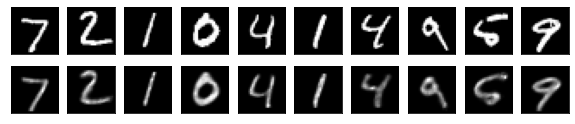

In [38]:
n = 10
plt.figure(figsize=(10, 2))
for i in range(n): 
    ax = plt.subplot(2, n, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(xTest[i].reshape(28, 28))
    plt.gray()
 
    ax = plt.subplot(2, n, i + 1 + n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(pred_images[i].reshape(28, 28))